In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

#Displaying all columns
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Here we can see some attributes are Object type and some are integer type. Let's see for list of object type and interger type data types

In [6]:
print('Shape of attribute collision_type with ? :',data[data['collision_type']=='?'].shape,'\n')
print('Shape of attribute Proper_damage with ? :',data[data['property_damage']=='?'].shape,'\n')
print('Shape of attribute police_report_available with ? :',data[data['police_report_available']=='?'].shape)

Shape of attribute collision_type with ? : (178, 40) 

Shape of attribute Proper_damage with ? : (360, 40) 

Shape of attribute police_report_available with ? : (343, 40)


In [7]:
#replacing ? with np.nan
data['collision_type']=data['collision_type'].replace('?',np.nan)

data['property_damage']=data['property_damage'].replace('?',np.nan)

data['police_report_available']=data['police_report_available'].replace('?',np.nan)

In [8]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
#replacing null values for collision_type with mode
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])

#replacing null values for property_damage with mode
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

#replacing null values for police_report_available with mode
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [10]:
#replacing Y and N of attribute fraud_reported to 1 and 0 respectively
data.fraud_reported=data.fraud_reported.map({'Y':1 ,'N':0})

In [11]:
#Checking for null values after filling null values

print('Missing values after filling null values--->')
data.isnull().sum()

Missing values after filling null values--->


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
# Statistical summary
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


Observations: 
    
    1. Some are new customers with 0 month and oldest customer are with 479 months as customer. 
    2. Minimum age of customer is 19 yrs. and maximum age is 64. 
    3. Minimum amount of policy deductable is 500.00 and maximum amount is 2000.00. 
    4. Minimum policy annual premium is 433.33 and maximum is 2047.59 
    5. Minimum amount of insured zip is 430104 and maximum amount is 620962 
    6. Minimum and maximum capital gains is 0. 
    7. maximum capital gain is 100500.00. 
 

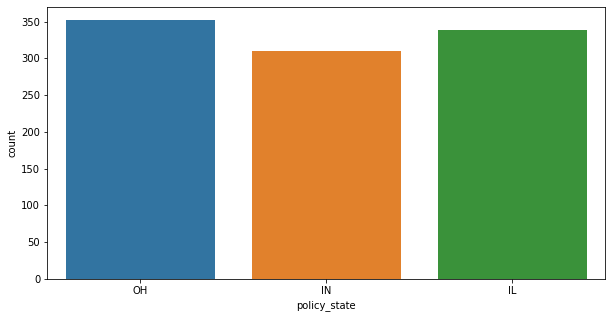

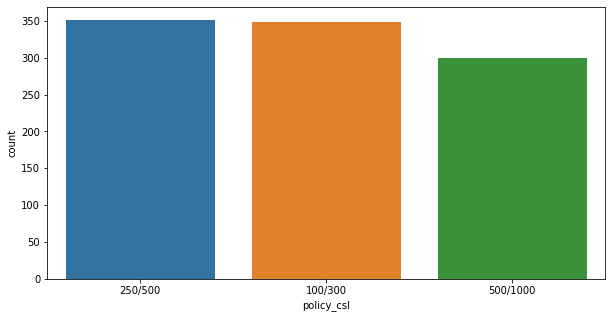

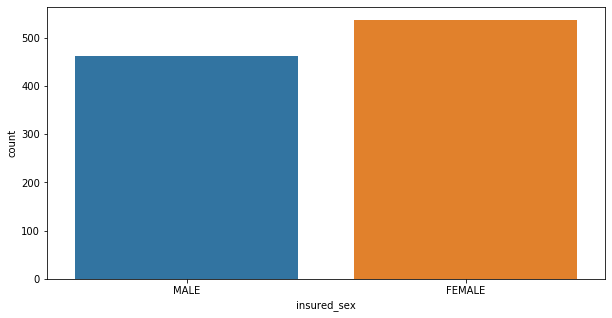

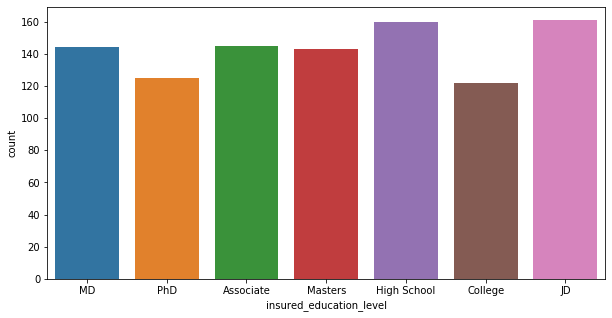

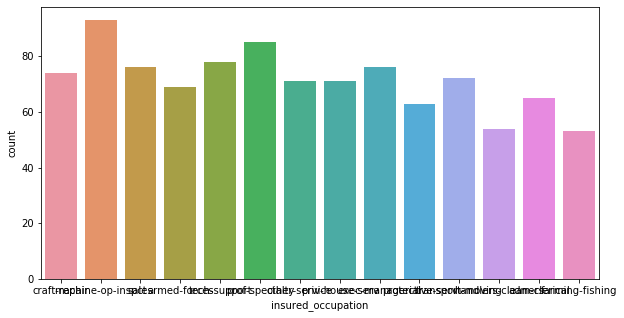

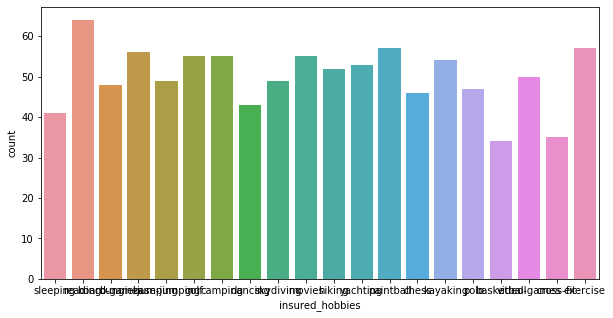

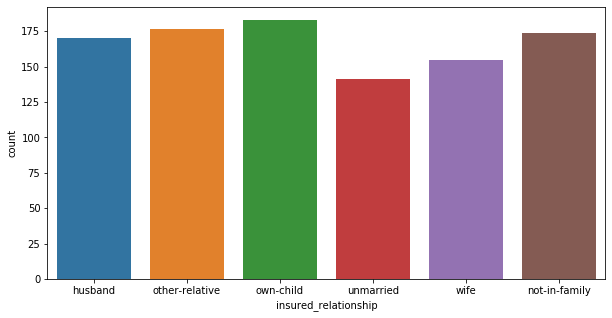

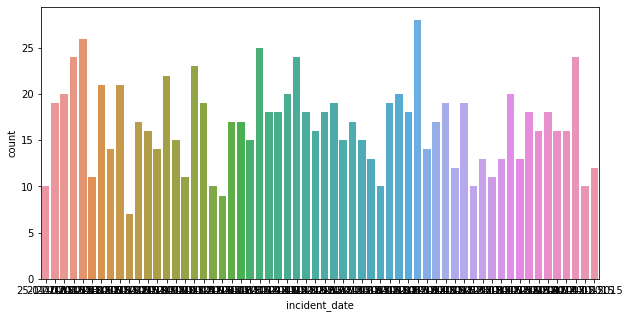

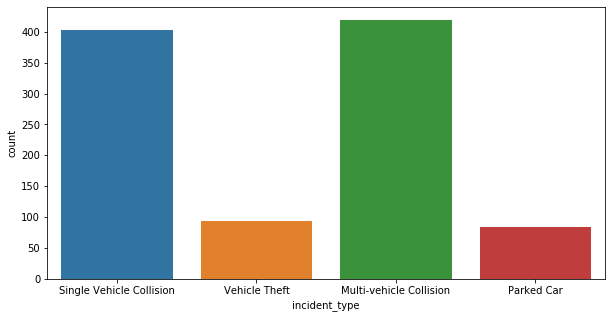

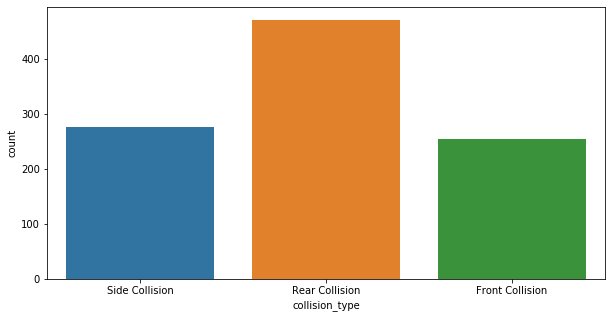

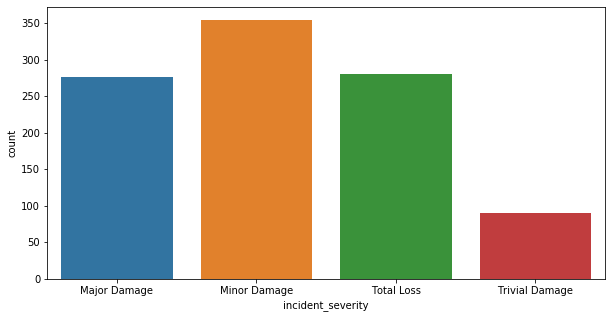

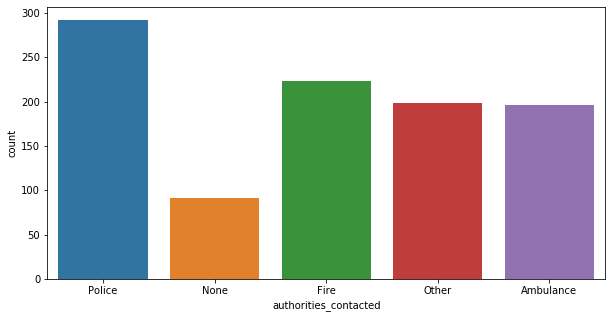

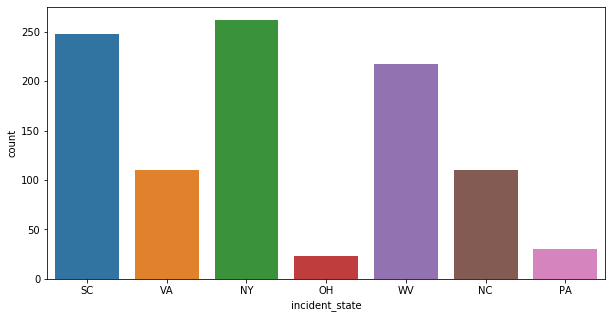

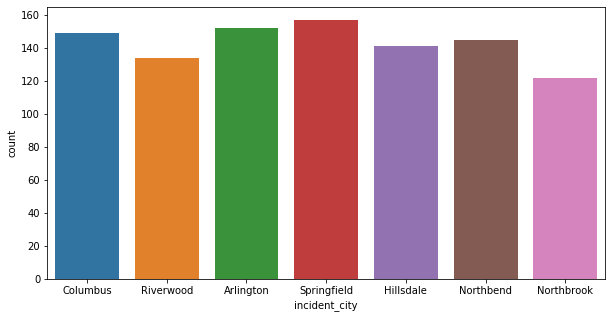

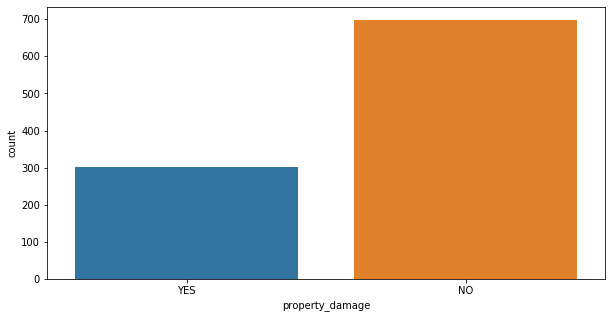

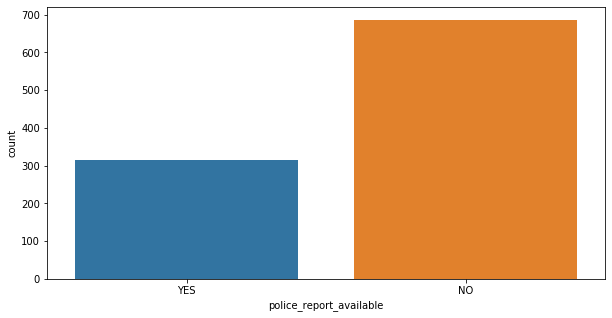

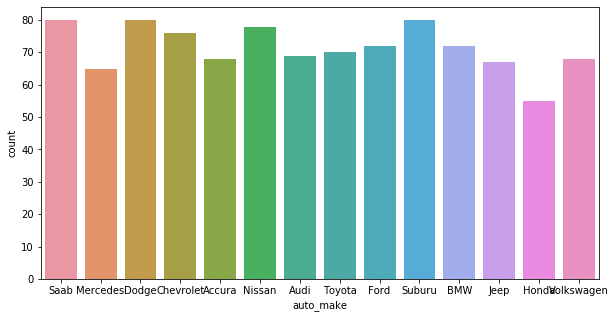

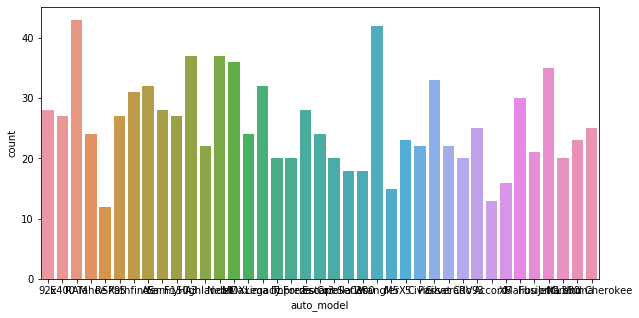

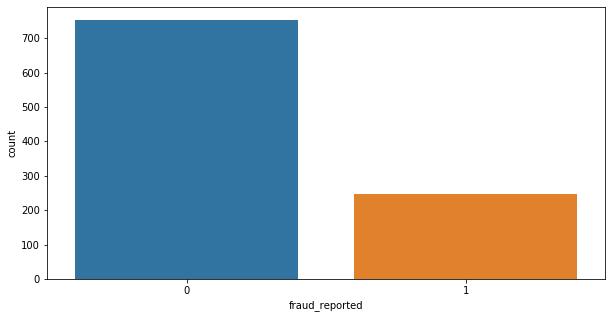

In [14]:
## Visulaization of catagorical data:
Obj_cols= ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
           'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 
           'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 
           'incident_city', 'property_damage', 'police_report_available', 'auto_make', 
            'auto_model', 'fraud_reported'] 


for i in Obj_cols:
    plt.figure(figsize=(10,5))
    ax=sns.countplot(data[i])
    plt.show()

Observations: 
    
    1. Most of the customers have policy state 'OH'(35), Policy state 'IL' have 34% customers and 'IN' have 31% customers. 
    2. Three types of policy_csl are 250/500 with 35% customers, 100/300(35% customers) and 500/1000 with 30% customers. 
    3. More no. of females have insured themselves compared to men. Ratio of female to male customers is 54% to 46%. 
    4. Most of the insurers have education High school and JD(16% each), MD, Masters and Associate have nearly 14% each and customers with collge and phd have 12% each. 
    5. Most of the insurers with occupation as machine operators have insured themselves. Peoples with occupation cleaners, farming and fishing have very less insurers. 
    6. Peoples having reading hobbies have more numbet of insurers. basket ball and cross-fit bobbies peoples have least insurers. 
    7. 18% insurers are own-child and other-relative. 17% are husband and not-in family. 15% and 14% insurers are wife and unmarried. 
    8. Incidents are recored for the year 2015 for month of january, February and 1st march. 
    9. 42% of incident type is Multi-vehicle collision. 40% is single vehicle collision. 9% incident type is vehicle theft and 8% incident type is parked car. 
    10. Rear collison type is 47% , side collision and front collision are 28% and 25% respectively. 
    11. Around 35% incident occured had minor damage. Incident witnessing total loss is 28%. Whereas, Major damage incidents are 28% and trivial damage incidents ar every less with 9%. 
    12. After incidents, 29% of insurers contacted police, 22% contacted Fire authorities, 20% contacted ambulance, 9% insurers contacted no one. 
    13. Most of the incidents take place in NY and SC and then WV state. 

    .

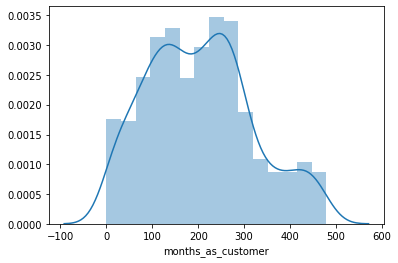

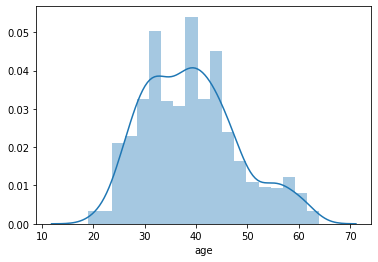

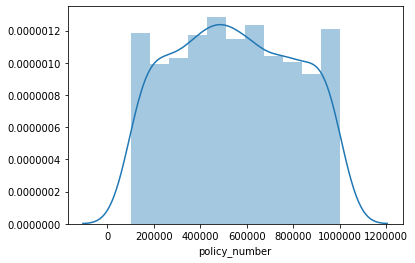

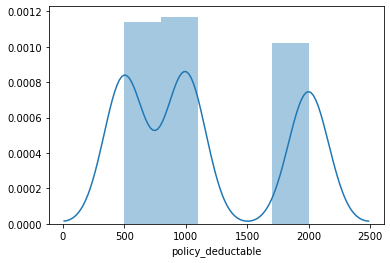

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

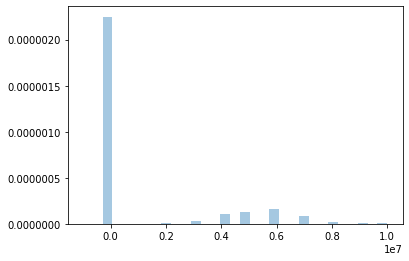

In [15]:
Int_cols = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 
           'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
           'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
           'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

for i in Int_cols:
    sns.distplot(data[i],kde=True)
    plt.show()

Above data shows that the dataset has skewness

In [16]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [19]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#applying label encoding to convert object type data to int type.
LE=LabelEncoder()
for i in Obj_cols:
    data[i]=LE.fit_transform(data[i])

In [20]:
##Checking for correlation of output variable with other attributes:
corr_matrix=data.corr()

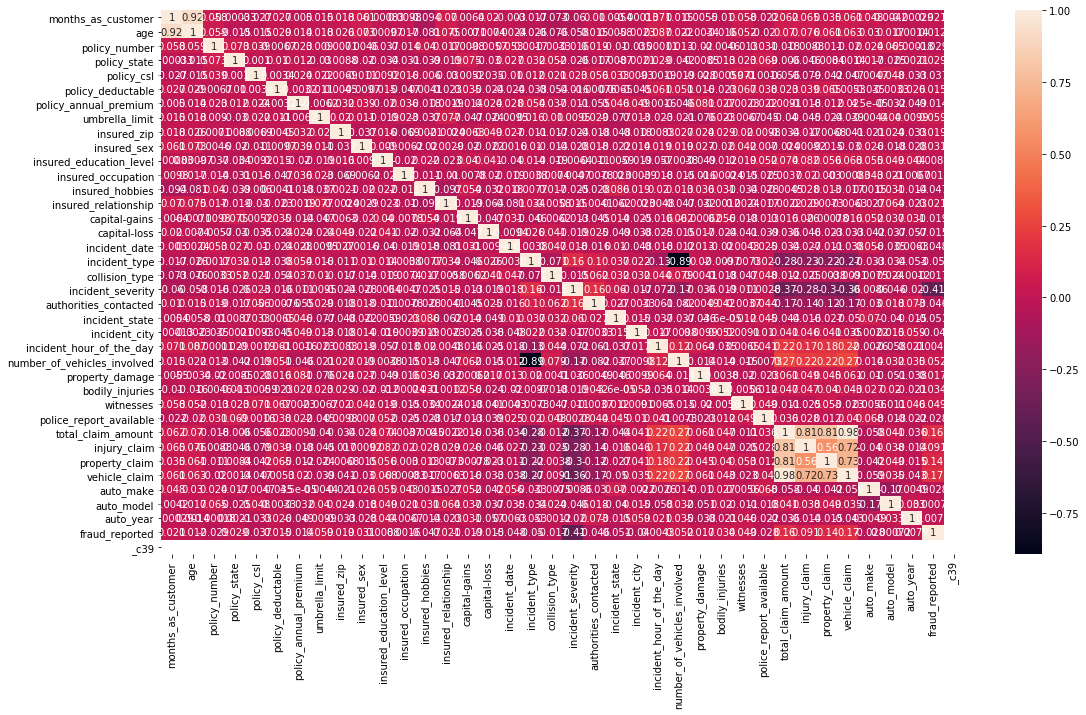

In [21]:
#Graphical Visualization of correlation 
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix,annot=True)

observations: 
    
    1. _c_39 is extra attribute with dont have any correlation with output variable. 
    2. Traget variable has Highest negative correlation with incident_severity. 
    3. target variable ha highest positive correlation with vehicle_claim and total-amount_claim. 
    4. target variable has near to 0 correlation with auto_model and insured_occupation.

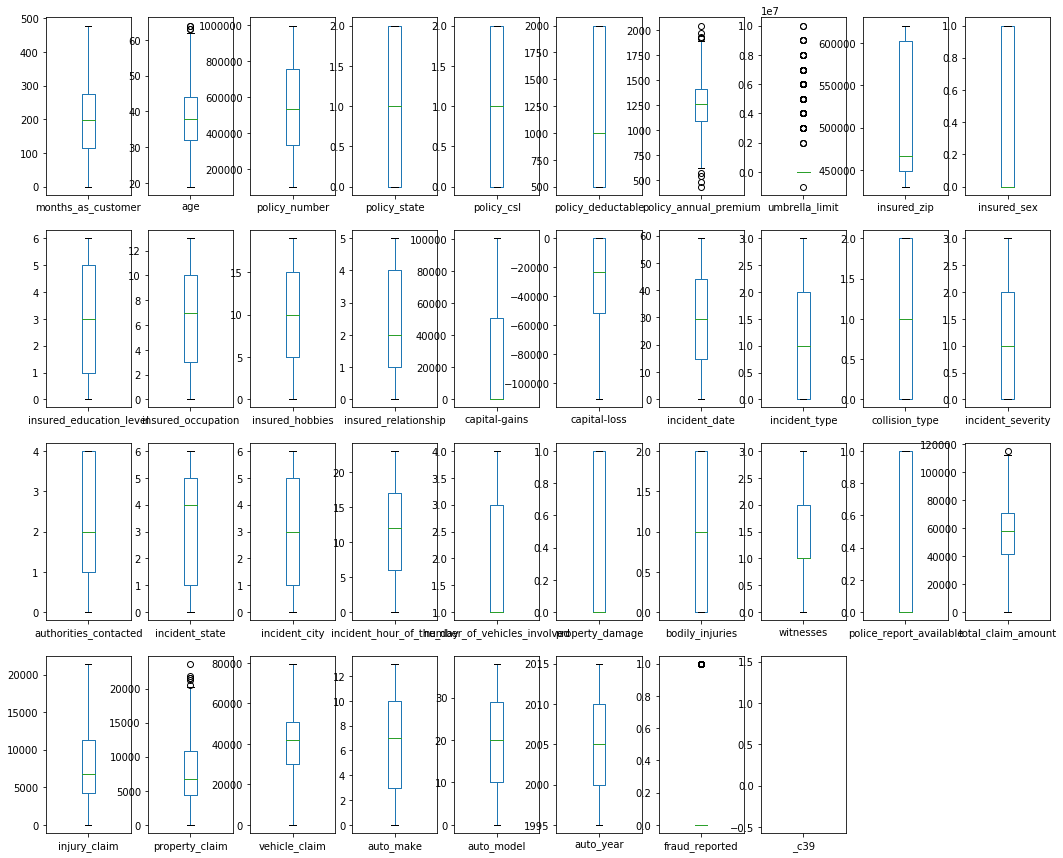

In [22]:
#Checking for outliers

color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

data.plot(kind='box',subplots=True,layout=(4,10),figsize=(18,15))
plt.show()

In [23]:
## Removing outliers

from numpy import percentile
data_new=data
data_new.shape
att_=att_ = ['policy_annual_premium','umbrella_limit','property_claim']
array=[None]*len(att_)
for x,i in enumerate(att_):
    q25,q75=percentile(data[i],25),percentile(data[i],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=q25-cut_off,q75+cut_off
    array[x]=[i,lower,upper]
    data_new[i]=data_new[i].apply(lambda x: lower if x<lower else (upper if x>upper else x))

In [24]:
data_new.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


Dataset has no skewness.

In [25]:
#dropping variables which affect less on target variable.
data_new.drop(['_c39','policy_number'],inplace=True,axis=1)

In [33]:
data_new.drop(['policy_bind_date'],inplace=True,axis=1)

In [39]:
# the data is in categories so we converted using LabelEncoder
c=data_new.columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in c:
    data_new[i]=le.fit_transform(data_new[i])
    
data_new.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,2,1,1,729,0,486,1,4,2,17,0,187,353,49,2,2,0,4,4,1,996,5,0,1,1,2,1,563,258,512,545,10,1,9,1
1,212,23,1,1,2,393,0,519,1,4,6,15,2,0,353,41,3,1,1,4,5,5,628,8,0,0,0,0,0,44,46,45,38,8,12,12,1
2,123,10,2,0,2,737,0,6,0,6,11,2,3,63,353,44,0,1,1,4,1,1,685,7,2,0,2,3,0,143,337,104,116,4,30,12,0
3,239,22,0,1,2,740,0,812,0,6,1,2,4,153,98,19,2,0,0,4,2,0,669,5,0,0,1,2,0,451,245,249,521,3,34,19,1
4,212,25,0,2,1,899,0,850,1,0,11,2,4,265,211,34,3,1,1,2,1,0,220,20,0,0,0,1,0,81,70,36,66,0,31,14,0


In [40]:
#Splitting x and y variable
x=data_new.drop(['fraud_reported'],axis=1) 
y=data_new['fraud_reported']

In [41]:
# Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(1000, 36)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
print('xtrain shape--->',x_train.shape)
print('ytrain shape--->',y_train.shape)
print('xtest shape--->',x_test.shape)
print('ytest shape--->',y_test.shape)

xtrain shape---> (780, 36)
ytrain shape---> (780,)
xtest shape---> (220, 36)
ytest shape---> (220,)


In [43]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score              
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Using Grid Search to check the best parameters
from sklearn.model_selection import GridSearchCV

In [44]:
#grid search cv for logistic regression classifier
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10}

In [45]:
#logistic regression
lr=LogisticRegression(C=10)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
score_lr=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr=scorelr.mean()

Accuracy Score: 0.7363636363636363
[[142  19]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       161
           1       0.51      0.34      0.41        59

    accuracy                           0.74       220
   macro avg       0.65      0.61      0.62       220
weighted avg       0.71      0.74      0.72       220

_________________________________________________
cross validation
Score of LogisticRegression(C=10) is:
[0.76 0.77 0.75 0.79 0.76 0.77 0.75 0.82 0.82 0.79]
Mean: 0.778
Std: 0.024819347291981694


In [46]:
#gridSearchCV for decision tree
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini'}

In [47]:
#Using DescisionTreeClassifier()
dtc=DecisionTreeClassifier(criterion=('gini'))
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
score_dtc=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc=scoredtc.mean()

Accuracy Score: 0.7727272727272727
[[135  26]
 [ 24  35]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       161
           1       0.57      0.59      0.58        59

    accuracy                           0.77       220
   macro avg       0.71      0.72      0.71       220
weighted avg       0.78      0.77      0.77       220

_________________________________________________
cross validation
Score of DecisionTreeClassifier() is:
[0.78 0.77 0.73 0.79 0.76 0.75 0.79 0.81 0.84 0.82]
Mean: 0.784
Std: 0.03168595903550971


In [48]:
#gridSearchCV for knn
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 14}

In [49]:
#knn
knc=KNeighborsClassifier(n_neighbors=14)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
predknc=knc.predict(x_test)
score_knc=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn=scoreknc.mean()

Accuracy Score: 0.7227272727272728
[[159   2]
 [ 59   0]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       161
           1       0.00      0.00      0.00        59

    accuracy                           0.72       220
   macro avg       0.36      0.49      0.42       220
weighted avg       0.53      0.72      0.61       220

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=14) is:
[0.75 0.75 0.75 0.75 0.74 0.75 0.77 0.79 0.77 0.76]
Mean: 0.758
Std: 0.014000000000000014


In [50]:
#Using Grid Search to check the best parameters for SVM
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [51]:
#Using SVC() from SVM

svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
score_svc=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=15)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc=scoresvc.mean()

0.7818181818181819
[[134  27]
 [ 21  38]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       161
           1       0.58      0.64      0.61        59

    accuracy                           0.78       220
   macro avg       0.72      0.74      0.73       220
weighted avg       0.79      0.78      0.79       220

_________________________________________________
cross validation
Score of SVC(C=10, kernel='linear') is:
[0.79104478 0.80597015 0.86567164 0.71641791 0.86567164 0.8358209
 0.74626866 0.79104478 0.76119403 0.76119403 0.77272727 0.90909091
 0.89393939 0.83333333 0.81818182]
Mean: 0.8111714156490276
Std: 0.05417776266111498


In [52]:
#grid search cv for Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [53]:
#Using Random Forest Classifier

rf=RandomForestClassifier(criterion='entropy', random_state=45,n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
score_rf=accuracy_score(y_test,predrf)
print('accuracy score:',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
print('_________________________________________________')
print('cross validation')
scorerf=cross_val_score(rf,x,y,cv=10)
print('Score of',rf,'is:')
print(scorerf)
print('Mean:',scorerf.mean())
print('Std:',scorerf.std())
cv_rf=scorerf.mean()

accuracy score: 0.7136363636363636
[[141  20]
 [ 43  16]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.44      0.27      0.34        59

    accuracy                           0.71       220
   macro avg       0.61      0.57      0.58       220
weighted avg       0.68      0.71      0.69       220

_________________________________________________
cross validation
Score of RandomForestClassifier(criterion='entropy', random_state=45) is:
[0.79 0.75 0.72 0.81 0.76 0.74 0.73 0.76 0.79 0.81]
Mean: 0.766
Std: 0.03072458299147446


In [54]:
#gaussion NB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
score_gnb=accuracy_score(y_test,predgnb)
print("Accuracy Score:",accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))
print('_________________________________________________')
print('cross validation')
scoregnb=cross_val_score(gnb,x,y,cv=10)
print('Score of',gnb,'is:')
print(scoregnb)
print('Mean:',scoregnb.mean())
print('Std:',scoregnb.std())
cv_gnb=scoregnb.mean()

Accuracy Score: 0.7136363636363636
[[130  31]
 [ 32  27]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       161
           1       0.47      0.46      0.46        59

    accuracy                           0.71       220
   macro avg       0.63      0.63      0.63       220
weighted avg       0.71      0.71      0.71       220

_________________________________________________
cross validation
Score of GaussianNB() is:
[0.78 0.74 0.7  0.69 0.71 0.71 0.7  0.82 0.8  0.75]
Mean: 0.74
Std: 0.043817804600413304


In [55]:
# our target variable is imbalance so we use resampling techniue to balance it then we will use model buildings
#under sampling

In [56]:
from imblearn.under_sampling import NearMiss
from collections import Counter
Counter(y_train)

Counter({1: 188, 0: 592})

In [57]:
ns = NearMiss()
x_train_ns,y_train_ns = ns.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 592, 1: 188})
The number of classes after fit Counter({0: 188, 1: 188})


In [58]:
#grid search cv for logistic regression classifier under sampling
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_ns,y_train_ns)
clf.best_params_

{'C': 0.01}

In [59]:
#logistic regression for under sampling 
lr=LogisticRegression(C=0.01)
lr.fit(x_train_ns,y_train_ns)
lr.score(x_train_ns,y_train_ns)
predlr=lr.predict(x_test)
score_lr_ns=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr_ns=scorelr.mean()

Accuracy Score: 0.6545454545454545
[[101  60]
 [ 16  43]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       161
           1       0.42      0.73      0.53        59

    accuracy                           0.65       220
   macro avg       0.64      0.68      0.63       220
weighted avg       0.74      0.65      0.67       220

_________________________________________________
cross validation
Score of LogisticRegression(C=0.01) is:
[0.75 0.76 0.74 0.75 0.74 0.73 0.75 0.77 0.76 0.76]
Mean: 0.751
Std: 0.011357816691600558


In [60]:
#Using Grid Search to check the best parameters for SVM for under sampling 
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_ns,y_train_ns)
clf.best_params_

{'C': 1, 'kernel': 'sigmoid'}

In [61]:
#Using SVC() from SVM for under sampling 

svc=SVC(kernel='sigmoid',C=1)
svc.fit(x_train_ns,y_train_ns)
predsvc=svc.predict(x_test)
score_svc_ns=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=10)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc_ns=scoresvc.mean()

0.6772727272727272
[[107  54]
 [ 17  42]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       161
           1       0.44      0.71      0.54        59

    accuracy                           0.68       220
   macro avg       0.65      0.69      0.65       220
weighted avg       0.75      0.68      0.69       220

_________________________________________________
cross validation
Score of SVC(C=1, kernel='sigmoid') is:
[0.74 0.75 0.75 0.75 0.75 0.74 0.76 0.76 0.76 0.76]
Mean: 0.752
Std: 0.007483314773547889


In [62]:
#over sample

In [63]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit ",(Counter(y_train)))
print("The number of classes after fit ",(Counter(y_train_os)))

The number of classes before fit  Counter({0: 592, 1: 188})
The number of classes after fit  Counter({1: 592, 0: 592})


In [64]:
#grid search cv for logistic regression classifier over sample
lr=LogisticRegression()
parameters= {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'C': 0.01}

In [65]:
#logistic regression over sample
lr=LogisticRegression(C=0.01)
lr.fit(x_train_os,y_train_os)
lr.score(x_train_os,y_train_os)
predlr=lr.predict(x_test)
score_lr_os=accuracy_score(y_test,predlr)
print("Accuracy Score:",accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('_________________________________________________')
print('cross validation')
scorelr=cross_val_score(lr,x,y,cv=10)
print('Score of',lr,'is:')
print(scorelr)
print('Mean:',scorelr.mean())
print('Std:',scorelr.std())
cv_lr_os=scorelr.mean()

Accuracy Score: 0.6772727272727272
[[108  53]
 [ 18  41]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       161
           1       0.44      0.69      0.54        59

    accuracy                           0.68       220
   macro avg       0.65      0.68      0.64       220
weighted avg       0.74      0.68      0.69       220

_________________________________________________
cross validation
Score of LogisticRegression(C=0.01) is:
[0.75 0.76 0.74 0.75 0.74 0.73 0.75 0.77 0.76 0.76]
Mean: 0.751
Std: 0.011357816691600558


In [66]:
#gridSearchCV for decision tree for over sample
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
clf=GridSearchCV(dt,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'criterion': 'entropy'}

In [67]:
#Using DescisionTreeClassifier() for over sample
dtc=DecisionTreeClassifier(criterion=('entropy'))
dtc.fit(x_train_os,y_train_os)
dtc.score(x_train_os,y_train_os)
preddtc=dtc.predict(x_test)
score_dtc_os=accuracy_score(y_test,preddtc)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('_________________________________________________')
print('cross validation')
scoredtc=cross_val_score(dtc,x,y,cv=10)
print('Score of',dtc,'is:')
print(scoredtc)
print('Mean:',scoredtc.mean())
print('Std:',scoredtc.std())
cv_dtc_os=scoredtc.mean()

Accuracy Score: 0.7863636363636364
[[144  17]
 [ 30  29]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       161
           1       0.63      0.49      0.55        59

    accuracy                           0.79       220
   macro avg       0.73      0.69      0.71       220
weighted avg       0.77      0.79      0.78       220

_________________________________________________
cross validation
Score of DecisionTreeClassifier(criterion='entropy') is:
[0.77 0.78 0.73 0.77 0.79 0.71 0.82 0.81 0.83 0.82]
Mean: 0.783
Std: 0.03769615364994153


In [68]:
#gridSearchCV for knn for over sample
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters,scoring='accuracy',cv=10)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'n_neighbors': 1}

In [69]:
#knn for over sample
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train_os,y_train_os)
knc.score(x_train_os,y_train_os)
predknc=knc.predict(x_test)
score_knn_os=accuracy_score(y_test,predknc)
print("Accuracy Score:",accuracy_score(y_test,predknc))
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))
print('_________________________________________________')
print('cross validation')
scoreknc=cross_val_score(knc,x,y,cv=10)
print('Score of',knc,'is:')
print(scoreknc)
print('Mean:',scoreknc.mean())
print('Std:',scoreknc.std())
cv_knn_os=scoreknc.mean()

Accuracy Score: 0.65
[[133  28]
 [ 49  10]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       161
           1       0.26      0.17      0.21        59

    accuracy                           0.65       220
   macro avg       0.50      0.50      0.49       220
weighted avg       0.61      0.65      0.62       220

_________________________________________________
cross validation
Score of KNeighborsClassifier(n_neighbors=1) is:
[0.68 0.73 0.63 0.6  0.58 0.66 0.66 0.74 0.77 0.67]
Mean: 0.6719999999999999
Std: 0.05775811631277461


In [70]:
#Using Grid Search to check the best parameters for SVM for over sample
svc=SVC()
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_os,y_train_os)
clf.best_params_

{'C': 10, 'kernel': 'poly'}

In [71]:
#Using SVC() from SVM for over sample
 
svc=SVC(kernel='poly',C=10)
svc.fit(x_train_ns,y_train_ns)
predsvc=svc.predict(x_test)
score_svc_os=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print('_________________________________________________')
print('cross validation')
scoresvc=cross_val_score(svc,x,y,cv=10)
print('Score of',svc,'is:')
print(scoresvc)
print('Mean:',scoresvc.mean())
print('Std:',scoresvc.std())
cv_svc_os=scoresvc.mean()

0.6909090909090909
[[120  41]
 [ 27  32]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       161
           1       0.44      0.54      0.48        59

    accuracy                           0.69       220
   macro avg       0.63      0.64      0.63       220
weighted avg       0.71      0.69      0.70       220

_________________________________________________
cross validation
Score of SVC(C=10, kernel='poly') is:
[0.74 0.78 0.67 0.68 0.73 0.72 0.74 0.79 0.77 0.78]
Mean: 0.74
Std: 0.039496835316262996


In [72]:
#we got best model at decision tree classifier with over sample

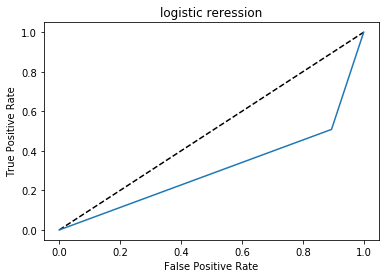

0.6828613538267185


In [73]:
#AUC_ROC Curve of random forest classifier for over sample
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,:1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic reression')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

In [74]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(dtc,'insurance.pkl')

['insurance.pkl']